In [56]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load your data
data = pd.read_csv("COMBINED_KOLKATA(2017-2022).csv")  # Ensure this file is in the same directory or provide full path

# Replace -999 with NaN and forward-fill missing values
data.replace(-999, np.nan, inplace=True)
data.fillna(method='ffill', inplace=True)

In [57]:
data.columns = data.columns.str.strip()

In [58]:
print(data.dtypes)


YEAR                   int64
MO                     int64
DY                     int64
PS                   float64
QV2M                 float64
PRECTOTCORR          float64
T2M                  float64
CLRSKY_SFC_SW_DWN    float64
ALLSKY_SFC_SW_DWN    float64
dtype: object


In [59]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv("COMBINED_KOLKATA(2017-2022).csv") 




In [60]:
# Prepare sequences for RNN
sequence_length = 30  # Use a 30-day window for each sequence
X, y = [], []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, :-1])  # All columns except the target
    y.append(data_scaled[i, -1])  # Target is the last column (ALLSKY_SFC_SW_DWN)

X, y = np.array(X), np.array(y)



In [61]:
# Split into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error')



C:\Users\bisha\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## PLOTS

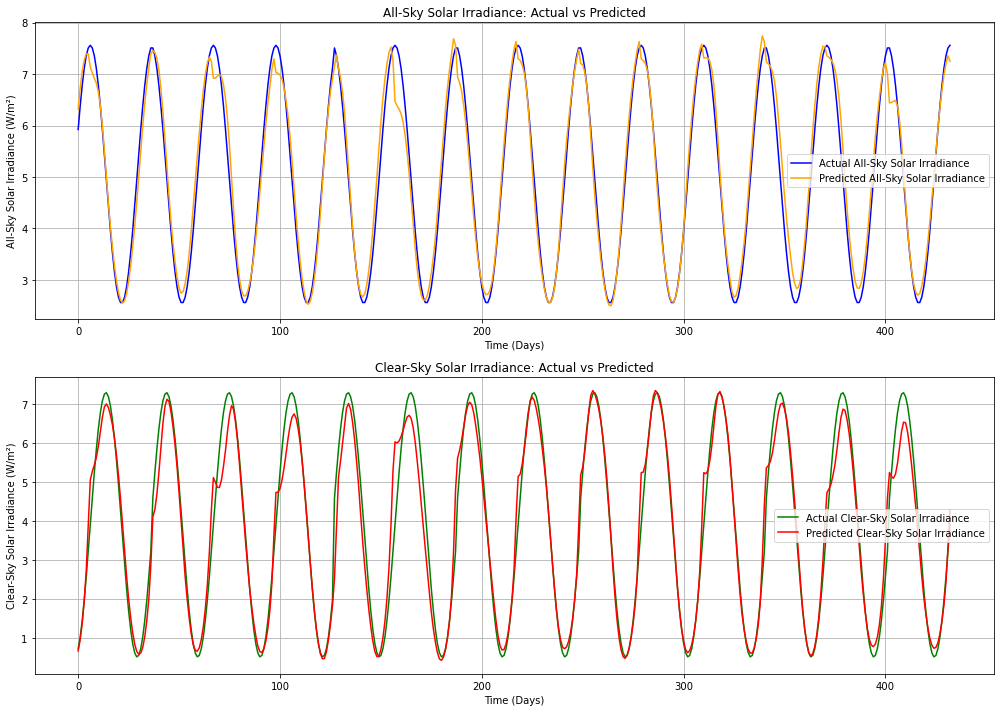

In [62]:
# Visualization of results
plt.figure(figsize=(14, 10))

# Plot for All-Sky Solar Irradiance
plt.subplot(2, 1, 1)
plt.plot(y_test_rescaled[:, -1], label='Actual All-Sky Solar Irradiance', color='blue')
plt.plot(y_pred_rescaled[:, -1], label='Predicted All-Sky Solar Irradiance', color='orange')
plt.title('All-Sky Solar Irradiance: Actual vs Predicted')
plt.xlabel('Time (Days)')
plt.ylabel('All-Sky Solar Irradiance (W/m²)')
plt.legend()
plt.grid()

# Plot for Clear-Sky Solar Irradiance
plt.subplot(2, 1, 2)
plt.plot(y_test_rescaled[:, -2], label='Actual Clear-Sky Solar Irradiance', color='green')
plt.plot(y_pred_rescaled[:, -2], label='Predicted Clear-Sky Solar Irradiance', color='red')
plt.title('Clear-Sky Solar Irradiance: Actual vs Predicted')
plt.xlabel('Time (Days)')
plt.ylabel('Clear-Sky Solar Irradiance (W/m²)')
plt.legend()
plt.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


The top graph illustrates the comparison between actual and predicted All-Sky solar irradiance over time, represented by blue and orange curves, respectively. The model's performance appears robust, as the predicted curve closely follows the actual data's cyclical patterns with minor deviations at some peaks and troughs. This indicates that the model effectively captures the seasonal variations and general trends, though there may be room for improvement in refining certain areas to reduce slight prediction errors.

The bottom graph displays the actual versus predicted values for Clear-Sky solar irradiance, shown with green for actual data and red for the predictions. The model demonstrates a strong alignment with the true data, maintaining the cyclical behavior and amplitude over time. However, slight misalignments in certain sections suggest that while the model performs well overall, enhancing its precision could help bridge the gaps in areas with prediction discrepancies. This could be particularly relevant during sharp transitions where the prediction slightly lags or leads the actual values.

### RESIDUAL PLOT

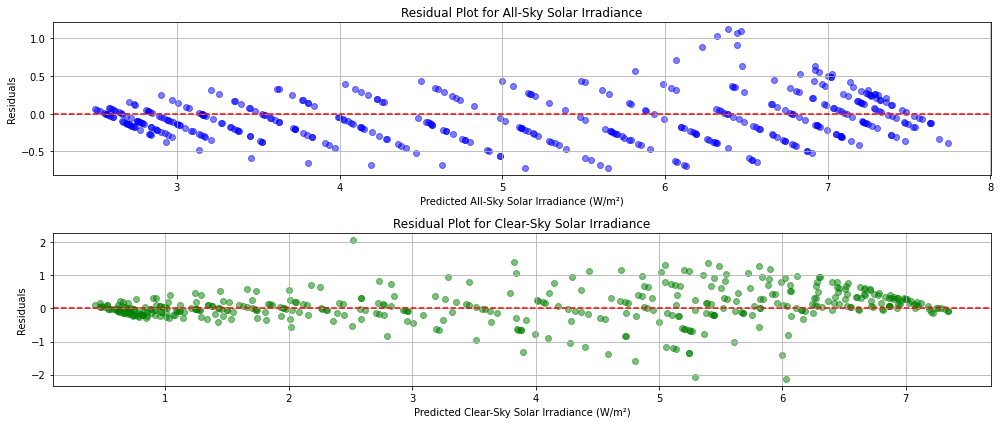

In [63]:
# Calculate residuals
residuals_allsky = y_test_rescaled[:, -1] - y_pred_rescaled[:, -1]
residuals_clearsky = y_test_rescaled[:, -2] - y_pred_rescaled[:, -2]

# Residual plot for All-Sky Solar Irradiance
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.scatter(y_pred_rescaled[:, -1], residuals_allsky, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot for All-Sky Solar Irradiance')
plt.xlabel('Predicted All-Sky Solar Irradiance (W/m²)')
plt.ylabel('Residuals')
plt.grid()

# Residual plot for Clear-Sky Solar Irradiance
plt.subplot(2, 1, 2)
plt.scatter(y_pred_rescaled[:, -2], residuals_clearsky, color='green', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot for Clear-Sky Solar Irradiance')
plt.xlabel('Predicted Clear-Sky Solar Irradiance (W/m²)')
plt.ylabel('Residuals')
plt.grid()

plt.tight_layout()
plt.show()


### HISTOGRAM

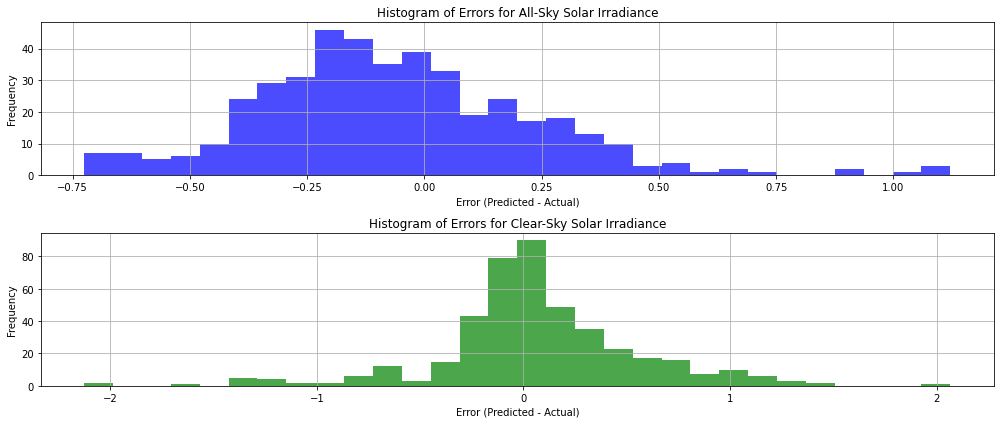

In [64]:
# Histogram of errors for All-Sky Solar Irradiance
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.hist(residuals_allsky, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Errors for All-Sky Solar Irradiance')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.grid()

# Histogram of errors for Clear-Sky Solar Irradiance
plt.subplot(2, 1, 2)
plt.hist(residuals_clearsky, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Errors for Clear-Sky Solar Irradiance')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()


### SCATTER PLOT

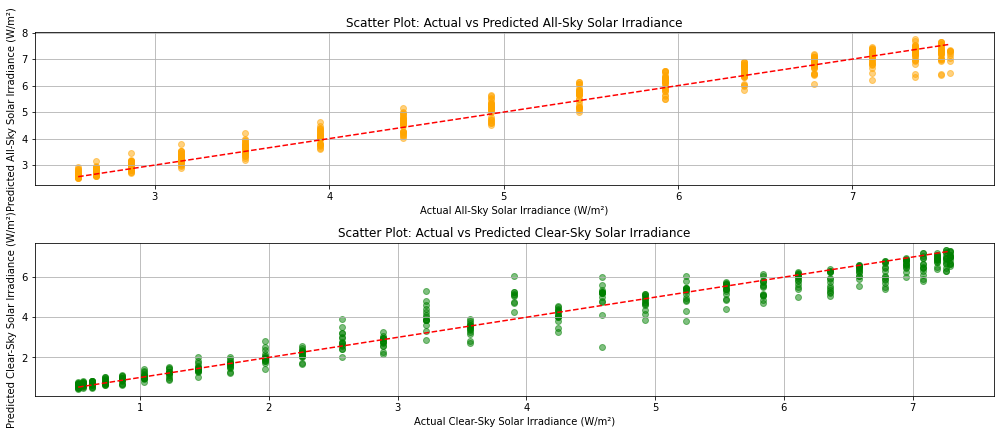

In [65]:
# Scatter plot for All-Sky Solar Irradiance
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.scatter(y_test_rescaled[:, -1], y_pred_rescaled[:, -1], color='orange', alpha=0.5)
plt.plot([y_test_rescaled[:, -1].min(), y_test_rescaled[:, -1].max()],
         [y_test_rescaled[:, -1].min(), y_test_rescaled[:, -1].max()], 
         color='red', linestyle='--')  # Line of perfect prediction
plt.title('Scatter Plot: Actual vs Predicted All-Sky Solar Irradiance')
plt.xlabel('Actual All-Sky Solar Irradiance (W/m²)')
plt.ylabel('Predicted All-Sky Solar Irradiance (W/m²)')
plt.grid()

# Scatter plot for Clear-Sky Solar Irradiance
plt.subplot(2, 1, 2)
plt.scatter(y_test_rescaled[:, -2], y_pred_rescaled[:, -2], color='green', alpha=0.5)
plt.plot([y_test_rescaled[:, -2].min(), y_test_rescaled[:, -2].max()],
         [y_test_rescaled[:, -2].min(), y_test_rescaled[:, -2].max()], 
         color='red', linestyle='--')  # Line of perfect prediction
plt.title('Scatter Plot: Actual vs Predicted Clear-Sky Solar Irradiance')
plt.xlabel('Actual Clear-Sky Solar Irradiance (W/m²)')
plt.ylabel('Predicted Clear-Sky Solar Irradiance (W/m²)')
plt.grid()

plt.tight_layout()
plt.show()


### BAR GRAPH

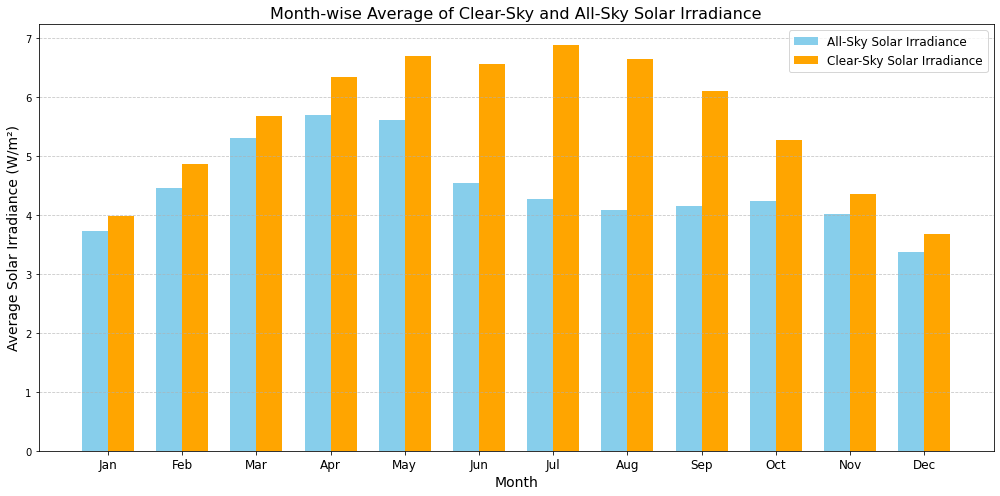

In [66]:
# Calculate month-wise averages for Clear-Sky and All-Sky Solar Irradiance
data['MONTH'] = data['MO']  # Create a new column for month if not already in the dataset
monthly_avg = data.groupby('MONTH')[['ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN']].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(14, 7))

# Plotting both Clear-Sky and All-Sky averages
bar_width = 0.35  # Width of the bars
x = np.arange(len(monthly_avg['MONTH']))  # The x locations for the groups

# Create bars for All-Sky
plt.bar(x - bar_width/2, monthly_avg['ALLSKY_SFC_SW_DWN'], width=bar_width, label='All-Sky Solar Irradiance', color='skyblue')

# Create bars for Clear-Sky
plt.bar(x + bar_width/2, monthly_avg['CLRSKY_SFC_SW_DWN'], width=bar_width, label='Clear-Sky Solar Irradiance', color='orange')

# Title and labels
plt.title('Month-wise Average of Clear-Sky and All-Sky Solar Irradiance', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Solar Irradiance (W/m²)', fontsize=14)
plt.xticks(x, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


#### The bar graph illustrates the month-wise average of All-Sky and Clear-Sky solar irradiance throughout the year. The blue bars represent the average All-Sky solar irradiance, while the orange bars depict the Clear-Sky solar irradiance. Observations indicate that solar irradiance is generally higher from late spring to early fall, peaking around June and July, which aligns with longer daylight periods and clearer skies during summer months.

#### Clear-Sky solar irradiance consistently shows higher values than All-Sky irradiance across all months, reflecting the reduced impact of clouds and atmospheric disturbances under clear-sky conditions. The difference between the two tends to be more pronounced in months with higher variability in weather, such as during spring and fall, when cloud cover fluctuates more. In contrast, during peak summer (June and July), both All-Sky and Clear-Sky irradiance levels are closer, suggesting more consistent sunlight with minimal cloud interference.

In [5]:
# Check for missing values or non-integer types in YEAR, MO, DY columns
missing_year = irradiance_data['YEAR'].isna().sum()
missing_month = irradiance_data['MO'].isna().sum()
missing_day = irradiance_data['DY'].isna().sum()

# Display the number of missing values in each column
missing_year, missing_month, missing_day


(0, 0, 0)

In [6]:
# Check the data types of the YEAR, MO, and DY columns
irradiance_data[['YEAR', 'MO', 'DY']].dtypes


YEAR    int64
MO      int64
DY      int64
dtype: object

In [7]:
weather_data.dtypes


Address                 object
Date time               object
Minimum Temperature    float64
Maximum Temperature    float64
Temperature            float64
Dew Point              float64
Relative Humidity      float64
Heat Index             float64
Wind Speed             float64
Wind Gust              float64
Wind Direction         float64
Wind Chill             float64
Precipitation          float64
Precipitation Cover    float64
Snow Depth             float64
Visibility             float64
Cloud Cover            float64
Sea Level Pressure     float64
Weather Type            object
Latitude               float64
Longitude              float64
Resolved Address        object
Name                    object
Info                   float64
Conditions              object
dtype: object

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Kolkata_weather_data_CLOUD_COVER(2017-2022).csv')

# Assuming the date column is named 'date', adjust as needed
df['Date time'] = pd.to_datetime(df['Date time'], errors='coerce')

# Split the date into year, month, and day
df['year'] = df['Date time'].dt.year
df['month'] = df['Date time'].dt.month
df['day'] = df['Date time'].dt.day

# If you want to ensure all columns are in int format
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

# Check the updated dataframe
print(df[['year', 'month', 'day']])


      year  month  day
0     2017      1    1
1     2017      1    2
2     2017      1    3
3     2017      1    4
4     2017      1    5
...    ...    ...  ...
2186  2022     12   27
2187  2022     12   28
2188  2022     12   29
2189  2022     12   30
2190  2022     12   31

[2191 rows x 3 columns]


In [16]:
# Load the cleaned cloud cover dataset after adding year, month, and day columns
cloud_cover_df = pd.read_csv('Kolkata_weather_data_CLOUD_COVER(2017-2022).csv')

# Convert `Date time` to datetime format and drop rows with conversion errors
cloud_cover_df['Date time'] = pd.to_datetime(cloud_cover_df['Date time'], errors='coerce')
cloud_cover_df = cloud_cover_df.dropna(subset=['Date time'])

# Extract year, month, and day from `Date time`
cloud_cover_df['year'] = cloud_cover_df['Date time'].dt.year
cloud_cover_df['month'] = cloud_cover_df['Date time'].dt.month
cloud_cover_df['day'] = cloud_cover_df['Date time'].dt.day

# Load the solar energy dataset
solar_energy_df = pd.read_csv('COMBINED_KOLKATA(2017-2022).csv')

# Merge datasets based on year, month, and day columns
merged_df = pd.merge(cloud_cover_df, solar_energy_df, left_on=['year', 'month', 'day'], right_on=['YEAR', 'MO', 'DY'], how='inner')

# Calculate the irradiance difference between all-sky and clear-sky values
merged_df['irradiance_difference'] = merged_df['ALLSKY_SFC_SW_DWN'] - merged_df['CLRSKY_SFC_SW_DWN']

# Calculate correlation between cloud cover and irradiance difference
correlation = merged_df['Cloud Cover'].corr(merged_df['irradiance_difference'])

# Display the correlation result and first few rows of merged data for verification
correlation, merged_df[['year', 'month', 'day', 'Cloud Cover', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'irradiance_difference']].head()


(-0.8173382721486856,
    year  month  day  Cloud Cover  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  \
 0  2017      1    1          4.9               3.40               3.78   
 1  2017      1    2          0.3               3.42               3.50   
 2  2017      1    3         10.7               3.32               3.42   
 3  2017      1    4          2.3               3.66               3.72   
 4  2017      1    5          0.0               4.09               4.10   
 
    irradiance_difference  
 0                  -0.38  
 1                  -0.08  
 2                  -0.10  
 3                  -0.06  
 4                  -0.01  )

#### Load Cloud Cover Dataset: The code loads a CSV file containing cloud cover data for Kolkata from 2017-2022.


#### The Date time column is converted to datetime format.
#### Rows with conversion errors (missing or incorrect dates) are dropped.


#### year, month, and day columns are created by extracting these parts from the Date time column.
#### Load Solar Energy Dataset: The solar energy data (also for Kolkata, 2017-2022) is loaded from another CSV file.



#### The cloud cover and solar energy datasets are merged on matching year, month, and day columns, keeping only rows that appear in both datasets.


#### A new column, irradiance_difference, is created by subtracting CLRSKY_SFC_SW_DWN (clear-sky irradiance) from ALLSKY_SFC_SW_DWN (all-sky irradiance).


#### The correlation between Cloud Cover and irradiance_difference is calculated.

#### Display Results:

#### The correlation result and the first few rows of the merged data are displayed for verification.

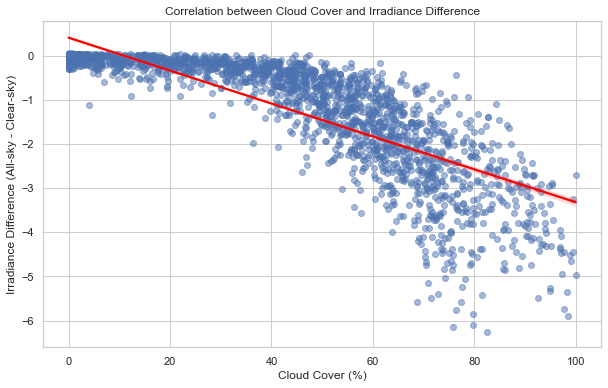

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot with regression line
sns.regplot(
    data=merged_df, 
    x='Cloud Cover', 
    y='irradiance_difference', 
    scatter_kws={'alpha':0.5}, 
    line_kws={'color': 'red'}
)

# Title and labels
plt.title("Correlation between Cloud Cover and Irradiance Difference")
plt.xlabel("Cloud Cover (%)")
plt.ylabel("Irradiance Difference (All-sky - Clear-sky)")

# Display the plot
plt.show()


### The plot shows a clear negative correlation between cloud cover and irradiance difference (All-sky - Clear-sky). As cloud cover increases, the irradiance difference tends to decrease, meaning that the actual solar irradiance (all-sky conditions) is significantly lower than the clear-sky irradiance. This is expected, as more clouds block sunlight, reducing the amount of solar energy that reaches the ground.

### The red regression line indicates this trend, showing that higher cloud cover generally corresponds to a larger negative difference in irradiance. This suggests a strong dependency of solar energy production on cloud cover, where higher cloud cover results in lower solar energy output.